# Исследование данных по продажам компьютерных игр

#### Описание проекта

Из открытых источников доступны исторические данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Заказчиком является интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры.

Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт, спланировать рекламные кампании и построить прогноз на 2017 г.

Дата проведения исследования: декабрь 2016 г.

#### Описание данных

* `name` — название игры
* `platform` — платформа
* `year_of_release` — год выпуска
* `genre` — жанр игры
* `na_sales` — продажи в Северной Америке (миллионы проданных копий)
* `eu_sales` — продажи в Европе (миллионы проданных копий)
* `jp_sales` — продажи в Японии (миллионы проданных копий)
* `other_sales` — продажи в других странах (миллионы проданных копий)
* `critic_score` — оценка критиков (максимум 100)
* `user_score` — оценка пользователей (максимум 10)
* `rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

#### Шаг 1. Откроем файл с данными и изучим общую информацию

##### 1.1 Импортируем необходимые библиотеки и считаем CSV-файлы с данными, сохраним их в датафрейм

In [2]:
#импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import re

In [3]:
games = pd.read_csv('/games.csv')

##### 1.2 Выведем первые строки набора данных. Изучим общую информацию датафрейме

In [4]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
games['Critic_Score'].sort_values().unique()

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

In [7]:
games['User_Score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [8]:
games['Rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [9]:
#посмотрим, какой временной промежуток охватывают данные
print('Период:', games['Year_of_Release'].min(), '-', 
      games['Year_of_Release'].max())

Период: 1980.0 - 2016.0


##### Вывод: 
Ознакомились с данными по продажам игр. Дана информация о продаже игр с годами выпуска с 1980 по 2016 г, содержание колонок соответствует заявленному в описании, всего представлено 16715 строк и 11 столбцов. В названиях столбцов использован верхний регистр. В данных есть пропущенные значения, год релиза и оценка критиков приведены в вещественном формате, в исследовании будет удобнее рассматривать в целочисленном. Оценка пользователей содержит текстовое значение 'tbd', поэтому столбец принимает формат object, необходимо обработать текствое значение и привести столбец к типу float.

#### Шаг 2. Подготовим данные

##### 2.1 Заменим названия столбцов (приведем к нижнему регистру)

In [10]:
games.columns = games.columns.str.lower()

In [11]:
#проверим внесенные изменения
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

##### 2.2 Обработаем пропуски

In [12]:
#посчитаем долю пропущенных значений в столбцах
round(games.isna().mean()*100)

name                0.0
platform            0.0
year_of_release     2.0
genre               0.0
na_sales            0.0
eu_sales            0.0
jp_sales            0.0
other_sales         0.0
critic_score       51.0
user_score         40.0
rating             40.0
dtype: float64

In [13]:
#посмотрим строки с пустыми значениями в столбце name
games.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [14]:
#посчитаем долю строк с пропусками в столбцах name и year_of_release
(len(games[games['name'].isna()]) + len(games[games['year_of_release'].isna()]))/ len(games) * 100

1.6212982351181575

In [15]:
#посчитаем долю продаж для строк с пропусками в столбце year_of_release
print((games[games['year_of_release'].isna()]['eu_sales'].sum() 
      + games[games['year_of_release'].isna()]['na_sales'].sum()
      + games[games['year_of_release'].isna()]['jp_sales'].sum()
      + games[games['year_of_release'].isna()]['other_sales'].sum())
      / (games['eu_sales'].sum() + games['na_sales'].sum() + games['jp_sales'].sum() + games['other_sales'].sum()) 
      * 100)

1.109502215751746


Пропущенные значения в столбце `name` совпадают с пропущенными значениями в столбце `genre`. Строки с пропусками по году выпуска невозможно достоверно заполнить, т.к. одна и та же игра для определенной платформы могла выпускаться в разные года. В дальнейшем исследовании мы будем анализировать только актуальный период, для этого необходимо знать год выпуска игры. Поскольку доля строк с пропусками составляет менее 2% данных и всего 1% от общей суммы продаж всех регионов, удалим строки с пропусками в анализируемых столбцах.

Все дальнейшие манипуляции с данными будем производить в новом датафрейме `data`, чтобы при необходимости отследить изменения.

In [16]:
data = games.dropna(subset=['name', 'year_of_release'])

In [17]:
#сравним размеры старого датафрейма и нового после удаления данных
print(games.shape)
print(data.shape)

(16715, 11)
(16444, 11)


Рассмотрим пропуски в столбцах с оценками критиков и пользователей. Как мы выяснили в ходе ознакомления с данными `user_score` содержит текстовое значение 'tbd' - to be determined, то есть пользовательский рейтинг игры будет определен позднее. В контексте исследования эти значения можно рассматривать наравне со значениями NA.

In [18]:
#посчитаем долю строк со значение 'tbd' в столбце user_score
len(games.query('user_score == "tbd"'))/len(games)*100

14.501944361352079

In [19]:
#заменим значения 'tbd' на значения nan
data.loc[data['user_score'] == "tbd", 'user_score'] = np.nan

In [20]:
len(data.query('user_score == "tbd"'))

0

In [21]:
#посчитаем долю пропущенных значений в столбцах с оценками и рейтингом
round(games.isna().mean()*100)

name                0.0
platform            0.0
year_of_release     2.0
genre               0.0
na_sales            0.0
eu_sales            0.0
jp_sales            0.0
other_sales         0.0
critic_score       51.0
user_score         40.0
rating             40.0
dtype: float64

In [22]:
data.query('rating.isna()').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [23]:
data.query('rating.isna()').tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Строки с пропущенными данным по рейтингу ESRB составляют 40% от исходного датафрейма и зачастую совпадают с пропусками в столбцах по оценкам пользователей (40%) и критиков (51%). Также более 14% строк - с неопределенными оценками пользователей (tbd). Такой пласт данных мы не можем урезать, но и заполнять пропуски медианными/средними значениями будет некорректно. Поэтому заполним пропуски в `critic_score` и `critic_score` номинальным значением -1, а пропуски в столбце `rating` - значением unknown.

In [24]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)
data['rating'] = data['rating'].fillna('unknown')

/var/folders/7c/qjb86hw11hs1199_j36mr2dm0000gn/T/ipykernel_10376/2892223278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['critic_score'] = data['critic_score'].fillna(-1)
/var/folders/7c/qjb86hw11hs1199_j36mr2dm0000gn/T/ipykernel_10376/2892223278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['user_score'] = data['user_score'].fillna(-1)
/var/folders/7c/qjb86hw11hs1199_j36mr2dm0000gn/T/ipykernel_10376/2892223278.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [25]:
#убедимся, что в датафрейме не осталось пропущенных значений
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

##### 2.3 Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему

In [26]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Столбец `year_of_release` имеет вещественный формат, поскольку эти данные отражают год выпуска, приведем их к привычному целочисленному формату. `critic_score` также лучше перевести в целочисленный формат, т.к. оценка критиков не предполагает дробные значения. `user_score`, напротив, имеет дробную часть в значениях, но из-за игр с неопределенной оценкой (to be determined) столбец принял тип object. Ранее мы обработали такие строки и заменили строковые значения tbd на -1, поэтому теперь можем привести столбец с оценками пользователей к вещественному формату.

In [27]:
data['year_of_release'] = data['year_of_release'].astype(int)
data['critic_score'] = data['critic_score'].astype(int)
data['user_score'] = data['user_score'].astype(float)

/var/folders/7c/qjb86hw11hs1199_j36mr2dm0000gn/T/ipykernel_10376/1539168659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_of_release'] = data['year_of_release'].astype(int)
/var/folders/7c/qjb86hw11hs1199_j36mr2dm0000gn/T/ipykernel_10376/1539168659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['critic_score'] = data['critic_score'].astype(int)
/var/folders/7c/qjb86hw11hs1199_j36mr2dm0000gn/T/ipykernel_10376/1539168659.py:3: SettingWithCopyWarning: 
A value is trying to be set on 

In [28]:
#проверим измененные типы данных
data.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         int64
user_score         float64
rating              object
dtype: object

##### 2.4 Обработаем явные и неявные дубликаты

In [29]:
#проверим данные на наличие явных дубликатов
data.duplicated().sum()

0

In [30]:
#проверим наличие неявных дубликатов
data.loc[data.duplicated(subset=['name', 'platform'], keep=False)].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83,5.5,E
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82,8.5,T


Need for Speed: Most Wanted хоть и представлен 4 раза, это разные вариации одной игры - они различаются по платформам и годам выпуска. Поэтому есть только один неявный дубликат: Madden NFL 13 на платформе PS3, удалим строку с меньшими продажами.

In [31]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first').reset_index(drop=True)

In [32]:
#проверим результат удаления дубликатов
data.loc[data.duplicated(subset=['name', 'platform'], keep=False)].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1177,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1574,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T
5883,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T
11534,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82,8.5,T


In [33]:
#убедимся, что в данных осталась верная строка
data.query('name == "Madden NFL 13"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
503,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81,5.8,E
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E
3933,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,-1,7.3,E
5800,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63,7.3,E
6956,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75,6.7,E


In [34]:
#проверим размерность датафрейма
data.shape

(16443, 11)

##### 2.5 Посчитаем суммарные продажи во всех регионах

In [35]:
data['sales'] = data.loc[:,['na_sales' , 'eu_sales', 'jp_sales' , 'other_sales',]].sum(axis='columns')

In [36]:
#убедимся, что столбец с суммой сформирован
data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52


##### Вывод:

В ходе предобработки данных привели к нижнему регистру названия столбцов. Были обнаружены пропуски в столбцах `name`, `year_of_release`, `genre`, `critic_score`, `user_score` и `rating`. Пропущенные значения в `name` и `genre` совпадают и занимают 2 строки с данными за 1993 г., а пропуски в `year_of_release` невозможно достоверно заполнить, т.к. одна и та же игра для определенной платформы могла выпускаться в разные года. В дальнейшем исследовании мы будем анализировать только актуальный период, для этого необходимо знать год выпуска игры. Поскольку доля строк с пропусками в этих столбцах составляет менее 2% данных и всего 1% от общей суммы продаж всех регионов, исключили их из датафрейма.

Строки с пропущенными данным по рейтингу ESRB составляют 40% от исходного датафрейма и зачастую совпадают с пропусками в столбцах по оценкам пользователей (40%) и критиков (51%). Также более 14% строк - с неопределенными на текущий момент оценками пользователей (tbd), заменили их на значения na, затем заполнили пропуски в `critic_score` и `user_score` номинальным значением -1, а пропуски в столбце `rating` - значением unknown. 

Пропуски в `critic_score` могут быть связаны с недостаточностью данных для расчета значений оценки, поскольку она формируется из усредненных оценок, в `user_score` - с фактическим отсутвием оценок от пользователей. Для всех столбцов с пропусками не исключена потеря данных при их выгрузке или формировании исходного файла. Помимо этого, причиной пропусков в `rating` может являться регион продажи игры, т.к. у многих стран есть свои возрастные рейтинги и не все применяют систему оценки ESRB, которая изначально ориентирована на США, Канаду и Мексику. Для анализируемых данных в зависмости от региона могут быть более предпочтительны PEGI — европейская рейтинговая система компьютерных и видеоигр или CERO — японская рейтинговая организация.

Также в ходе предобработки изменили типы данных для колонок `year_of_release`, `critic_score`, `user_score`, удалили неявные дубликаты и убедились в отсутствии явных.

#### Шаг 3. Проведем исследовательский анализ данных

##### 3.1 Посмотрим, сколько игр выпускалось в разные годы

Text(0, 0.5, 'Количество игр')

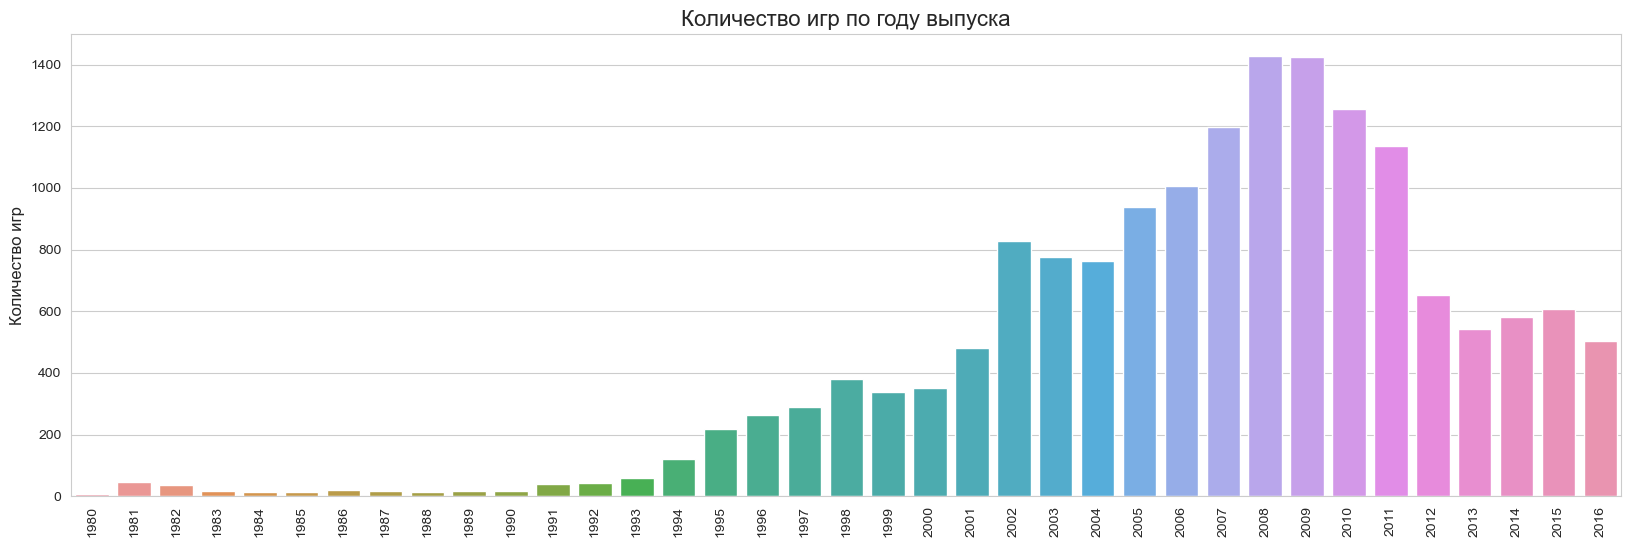

In [37]:
df=data.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
sns.set_style("whitegrid")
plt.figure(figsize=(20, 6))
sns.barplot(data=df, x="year_of_release", y="name")
plt.title('Количество игр по году выпуска', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Количество игр', fontsize=12)

Рассмотрим график продаж игр по годам. C 1980 по 1992 гг количество проданных игр в год не превышало 50, начиная с 1992 г продажи игр начали расти и, несмотря на небольшой спад в 1999-2000 гг, к 2001 г превысили отметку в 450. Почти в 2 раза увеличились продажи в 2002 году по сравнеию с 2001, скорее всего, это связано с развитием онлайн-продаж и большим количеством релизов новых игр. В 2003-2004 гг продажи остались практически на том же уровне с небольшим спадом, а в период с 2005 по 2008 продажи снова росли вместе с развитием игровой индустрии и новых технических возможностей. В анализируемом периоде продажи достигли своего пика в 2008-2009 годах, превысив отметку в 1400 проданных игр. Вероятно, статистика, которую мы видим, начиная с 2008 г связана с мировым экономическим кризисом, который вызвал стремительный спад продаж в 2010-2013 гг. Как итог, средний уровень продаж сократился практически в 3 раза, но уже с 2014 г мы можем наблюдать тенденцию к росту, которая может найти свое отражение и в 2016 г, по которому мы еще не имеем полных данных.

Поскольку целью исследования является подготовка данных для планирования рекламных кампаний и построения прогноз на 2017 г, при дальнейшем анализе будет корректнее использовать актуальные данные за последние полные 4 года (2012-2015) и за неполный 2016 г, т.к. его наиболее точно отражают текущее состояние рынка. Создадим новый датафрейм `data_new`, который будет в себе содержать данные за актуальный период: 2012-2016 гг.

In [38]:
data_new = data.query('2012 <= year_of_release <= 2016')

In [39]:
data_new['year_of_release'].max()

2016

##### 3.2 Посмотрим, как менялись продажи по платформам

Чтобы ответить на вопрос, за какой характерный срок появляются новые и исчезают старые платформы, выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

In [40]:
#выведем данные с наибольшими продажами по платформам
#отсекаем данные до 1994 года, поскольку платформы из топ-10 не были представлены ранее
platform_top10 = (
    data
    .query('year_of_release >= 1994')
    .pivot_table(index='platform', values='sales', aggfunc='sum')
    .reset_index()
    .sort_values(by='sales', ascending=False)
    .head(10)
)
platform_top10

,platform,sales
14,PS2,1233.56
26,X360,961.24
15,PS3,931.33
24,Wii,891.18
3,DS,802.76
13,PS,727.58
16,PS4,314.14
5,GBA,312.88
17,PSP,289.53
1,3DS,257.81


In [41]:
#создадим список самых популярных платформ за период 1994-2016
p = list(platform_top10['platform'])

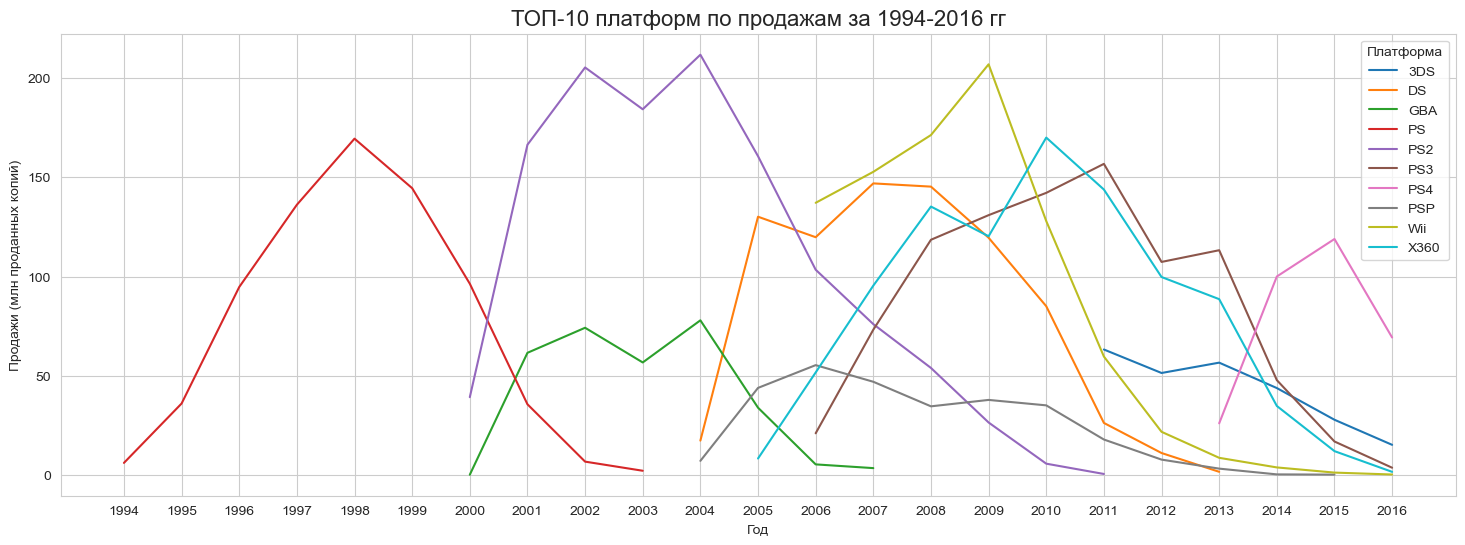

In [42]:
(data.query('platform in @p and year_of_release >= 1994')
 .pivot_table(index=['year_of_release'], columns='platform', values='sales', aggfunc='sum')
 .plot(figsize=(18, 6)))
plt.xticks(list(data.query('year_of_release >= 1994')['year_of_release'].unique()))
plt.title('ТОП-10 платформ по продажам за 1994-2016 гг', fontsize=16)
plt.xlabel('Год')
plt.ylabel('Продажи (млн проданных копий)')
plt.legend(title='Платформа', bbox_to_anchor=(1, 1))

Полагаясь на продажи игр для PlayStation и Nintendo DS (GBA), можно отметить, что характерный срок полной смены старых платформ новыми версиями около 10 лет, при этом новые платформы появляются уже на 5-6 году существования старых.

##### 3.3 Определим, какие платформы лидируют по продажам, растут или падают

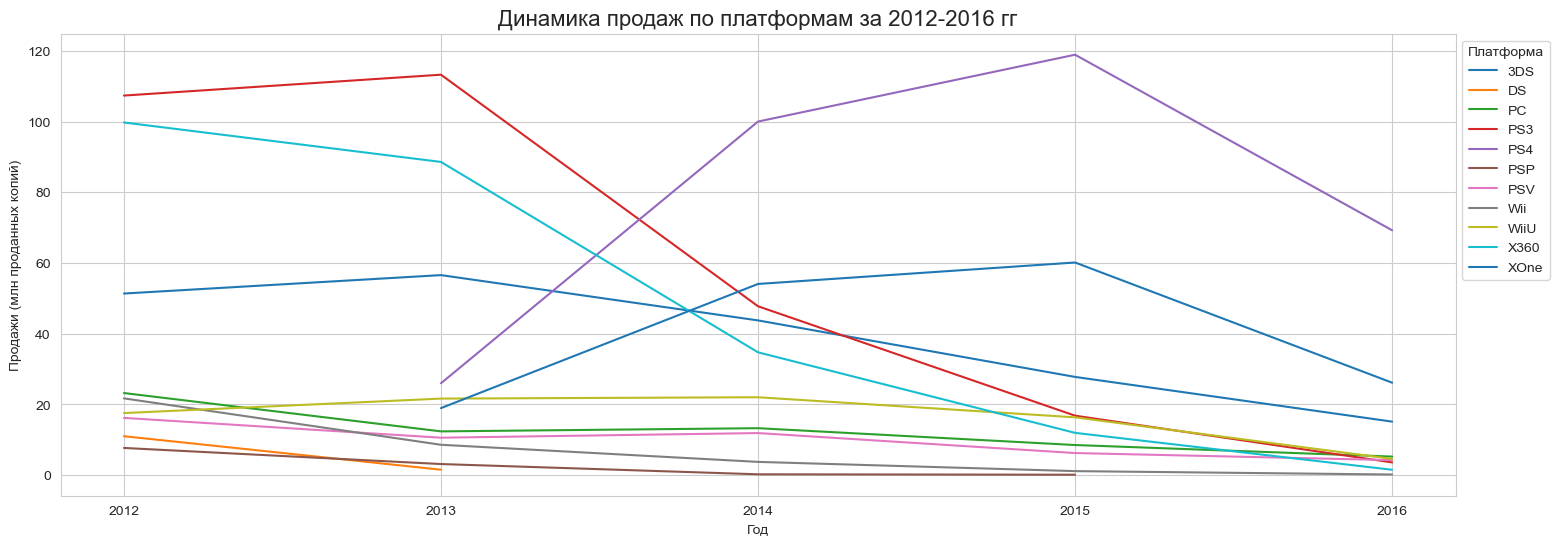

In [43]:
(data_new
 .pivot_table(index=['year_of_release'], columns='platform', values='sales', aggfunc='sum')
 .plot(figsize=(18, 6)))
plt.xticks(list(data_new['year_of_release'].unique()))
plt.title('Динамика продаж по платформам за 2012-2016 гг', fontsize=16)
plt.xlabel('Год')
plt.ylabel('Продажи (млн проданных копий)')
plt.legend(title='Платформа', bbox_to_anchor=(1, 1))

In [44]:
(data_new
 .pivot_table(index=['year_of_release'], columns='platform', values='sales', aggfunc='sum', margins=True))

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne,All
year_of_release,,,,,,,,,,,,
2012,51.36,11.01,23.22,107.35,NaN,7.69,16.19,21.71,17.56,99.74,NaN,355.83
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96,361.24
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07,331.53
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14,267.98
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15,129.94
All,194.61,12.55,62.65,288.78,314.14,11.19,49.18,35.37,82.19,236.54,159.32,1446.52


На протяжении рассматриваемого периода по сумме продаж всех регионов лидирует платформа PlayStation: с 2012 по 2014 гг продажи игр для PS3 примерно на 20% выше продаж его ближайшего конкурента X360, с появлением новых версий обоих платформ, продажи игр на них устремились вниз, а для набирающих популярность PS4 и XOne продажи первой на стали превышать продажи последней более, чем на 40%. Дополнительно среди лидеров можно отметить Nintendo со стабильно высоким уровнем продаж игр на 3DS (≈30-50 млн копий в год) и портативную платформу WiiU (≈20 млн копий в год). На PSV, конкурирующую с WiiU, также стабильно приходится около 10 млн проданных копий. В среднем 12 млн игр в год продается для PC.

Данные за 2016 г неполные, поэтому низкий уровень продаж за этот год некорректно считать спадом. Ориентируясь на растущие продажи в предыдущие годы явно выделим две потенциально прибыльные платформы: PS4 и XOne. Также можно предположить, что фанаты компьютерных игр могут обеспечить стабильную прибыль для PC.

##### 3.4 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

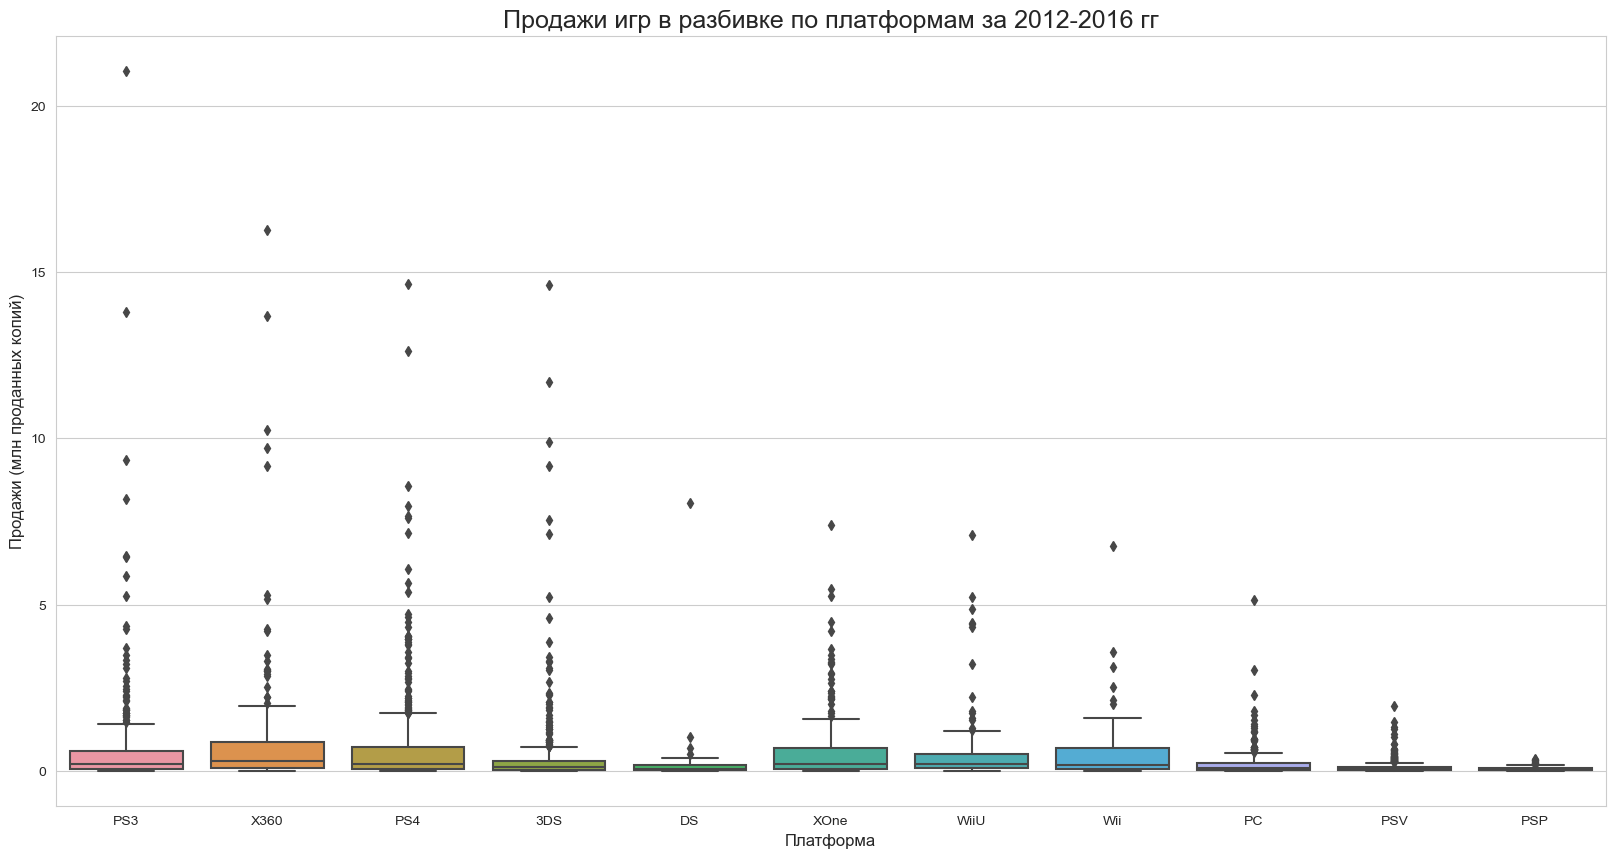

In [45]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=data_new["platform"], y=data_new["sales"])
plt.title('Продажи игр в разбивке по платформам за 2012-2016 гг', fontsize=18)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи (млн проданных копий)', fontsize=12)
plt.show()

Диаграмма размаха показывает выбросы, но по ней сложно определить межквартильный размах и медиану. Оставим эту диаграмму, чтобы иметь в виду разброс данных, и построим новую, ограничив значения по оси ординат.

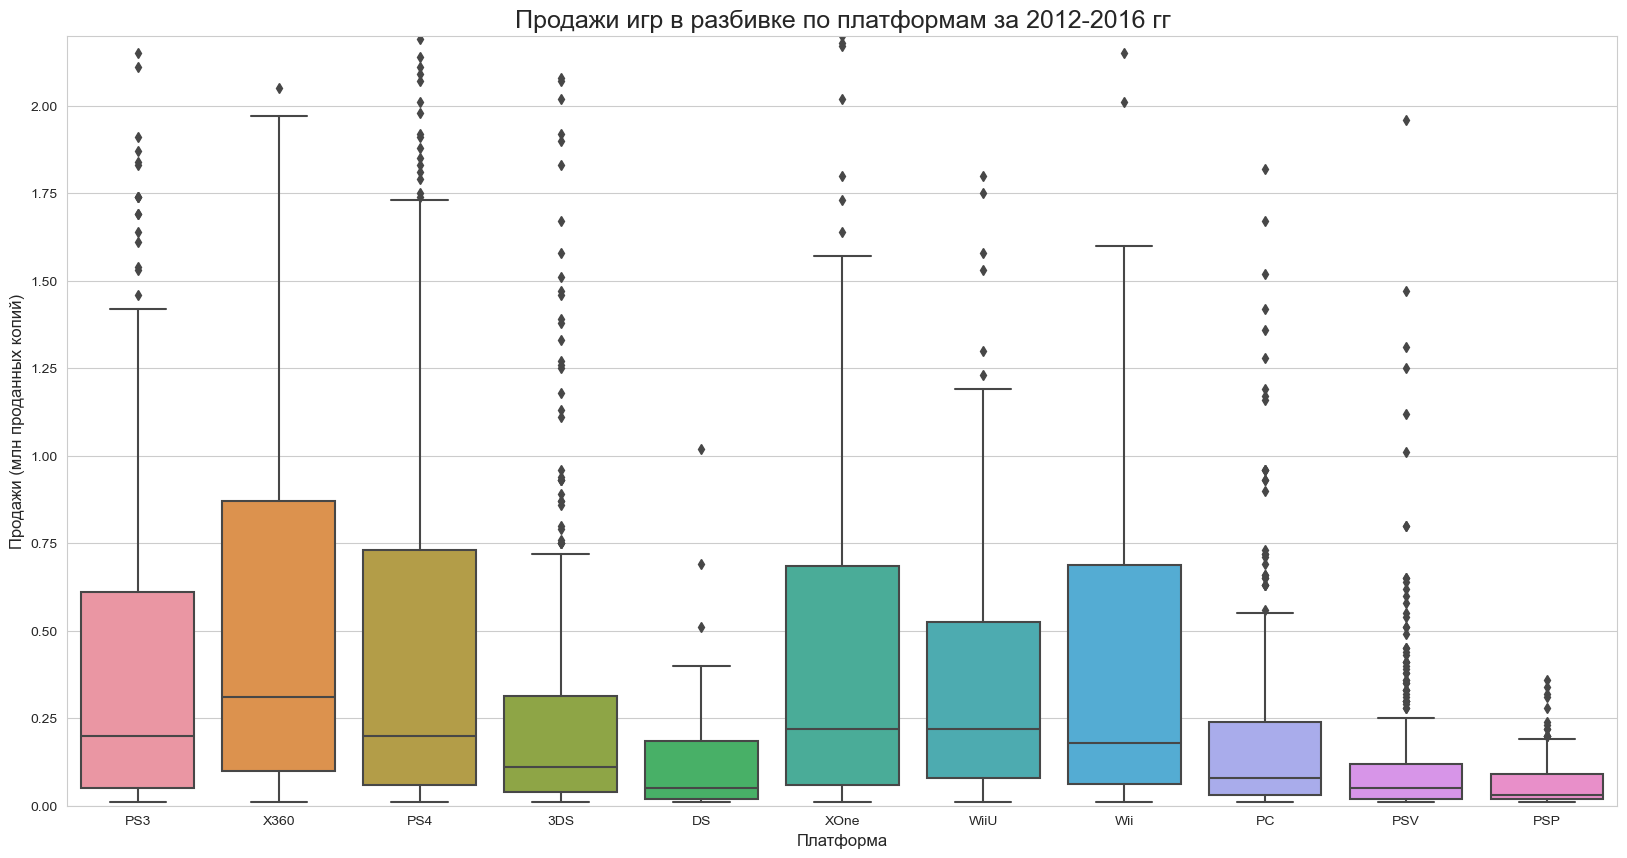

In [46]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=data_new["platform"], y=data_new["sales"]).set_ylim(0, 2.2)
plt.title('Продажи игр в разбивке по платформам за 2012-2016 гг', fontsize=18)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи (млн проданных копий)', fontsize=12)
plt.show()

По скорректированной диаграмме видим, что медианное значение по большинству платформ не превышает 250 тыс проданных копий, а межквартильный размах представлен в пределах 10-750 тыс. Единственным исключением является X360 с медианой около 300 тыс копий, а 50% продаж по платформе находятся в диапазоне от 120 до 900 тыс проданных копий.

Медианное значение продаж для PS3, PS4, Wii равно примерно 200 тыс проданных копий, для XOne, WiiU - примерно 250 тыс, для остальных платформ около 100-120 тыс. По межквартильному размаху можно сравнить, объемы продаж для разных версий консолей, например: PS4 имеет больший объем продаж, чем PS3, аналогичная для пар 3DS-DS и PSV-PSP, у X360-XOne, наоборот, старая версия более популярна, как и в случае WiiU-Wii. 

Рынок игр очень специфичный и некоторые игры исеют стабильно высокие продажи в течение нескольких лет. Скорее всего, выбросы, которые мы видим на диаграмме размаха, как раз демонстрируют продажи по самым популярным играм, соответственно, очистив данные от них, мы не будем видеть реальной картины рынка видеоигр.

##### 3.5 Исследуем, как влияют отзывы пользователей и критиков на продажи внутри популярных платформ

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами для PS4 и XOne

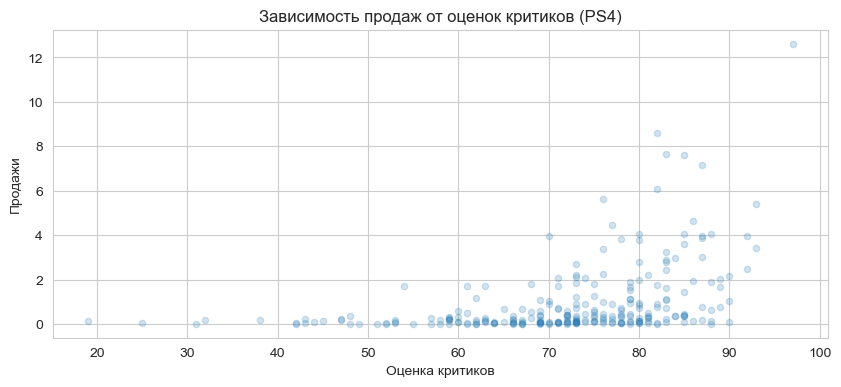

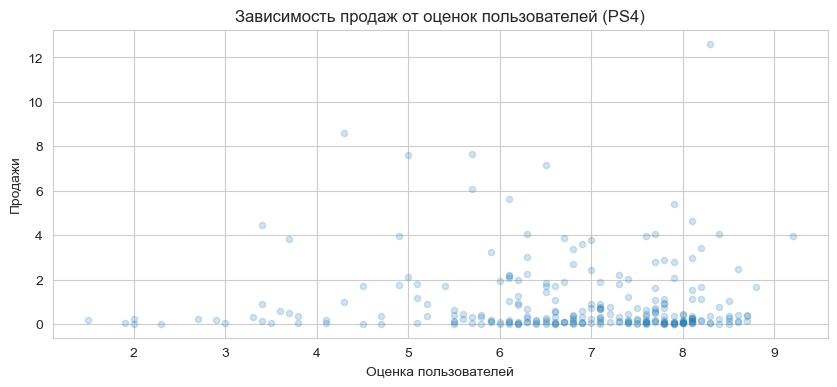

In [47]:
(data_new.query('critic_score >= 0 and platform == "PS4"')
 .sort_values('sales')
 .plot(x='critic_score', y='sales', kind='scatter', grid=True, figsize=(10, 4), alpha=0.2))
plt.title('Зависимость продаж от оценок критиков (PS4)', fontsize=12)
plt.xlabel('Оценка критиков', fontsize=10)
plt.ylabel('Продажи', fontsize=10)
plt.show()

(data_new.query('user_score >= 0 and platform == "PS4"')
 .sort_values('sales')
 .plot(x='user_score', y='sales', kind='scatter', grid=True, figsize=(10, 4), alpha=0.2))
plt.title('Зависимость продаж от оценок пользователей (PS4)', fontsize=12)
plt.xlabel('Оценка пользователей', fontsize=10)
plt.ylabel('Продажи', fontsize=10)
plt.show()

In [48]:
#выведем коэффициенты корреляции Пирсона
round((data_new
 .query('critic_score >= 0 and user_score >= 0 and platform == "PS4"')[['user_score', 'critic_score', 'sales']]
 .corr()), 2)

,user_score,critic_score,sales
user_score,1.00,0.56,-0.03
critic_score,0.56,1.00,0.41
sales,-0.03,0.41,1.00


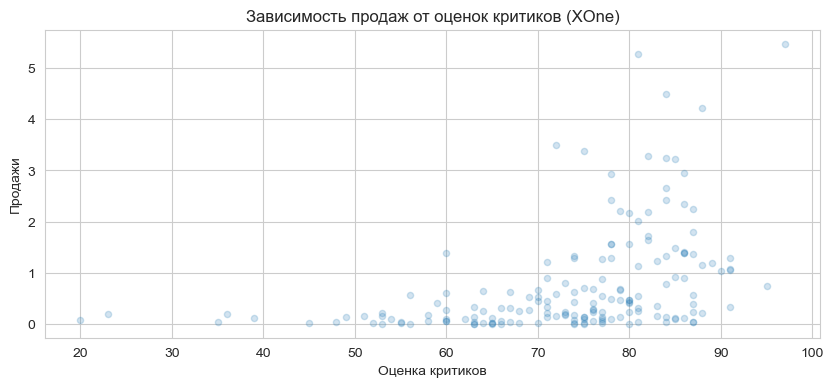

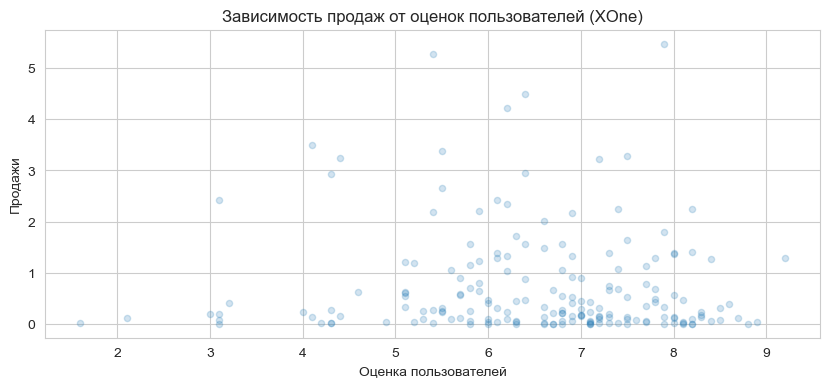

In [49]:
(data_new.query('critic_score >= 0 and platform == "XOne"')
 .sort_values('sales')
 .plot(x='critic_score', y='sales', kind='scatter', grid=True, figsize=(10, 4), alpha=0.2))
plt.title('Зависимость продаж от оценок критиков (XOne)', fontsize=12)
plt.xlabel('Оценка критиков', fontsize=10)
plt.ylabel('Продажи', fontsize=10)
plt.show()

(data_new.query('user_score >= 0 and platform == "XOne"')
 .sort_values('sales')
 .plot(x='user_score', y='sales', kind='scatter', grid=True, figsize=(10, 4), alpha=0.2))
plt.title('Зависимость продаж от оценок пользователей (XOne)', fontsize=12)
plt.xlabel('Оценка пользователей', fontsize=10)
plt.ylabel('Продажи', fontsize=10)
plt.show()

In [50]:
#выведем коэффициенты корреляции Пирсона
round((data_new
 .query('critic_score >= 0  and user_score >= 0 and platform == "XOne"')[['user_score', 'critic_score', 'sales']]
 .corr()), 2)

,user_score,critic_score,sales
user_score,1.00,0.47,-0.09
critic_score,0.47,1.00,0.41
sales,-0.09,0.41,1.00


Согласно графикам и матрицам корреляции, оценки пользователей никак не влияют на продажи игр. Между оценками критиков и продажами платформ PS4 и XOne на графиках прослеживается прямая зависмость - чем выше оценки критиков, тем выше уровень продаж, по обеим платформам коэффициенты корреляции равны 0.41, что подтверждает умеренную связь между величинами.

Посмотрим зависимости по другим форматам платформ: персональным компьютерам (PC) и одной из портативных консолей - Nintendo 3DS.

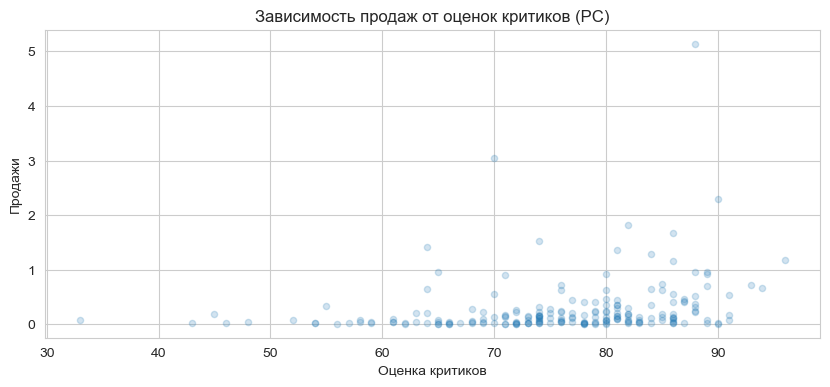

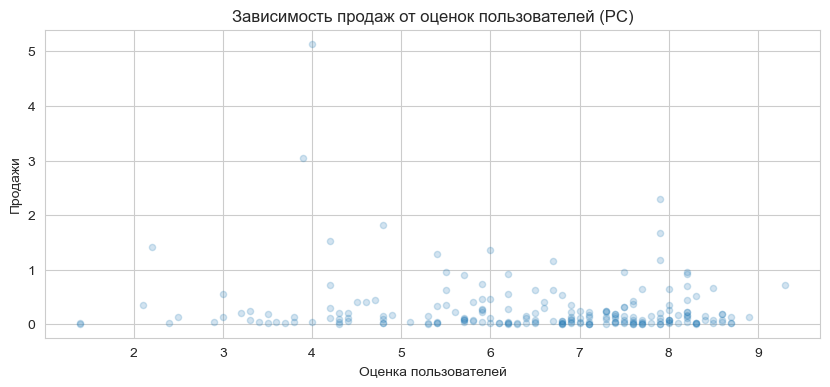

In [51]:
(data_new.query('critic_score >= 0 and platform == "PC"')
 .sort_values('sales')
 .plot(x='critic_score', y='sales', kind='scatter', grid=True, figsize=(10, 4), alpha=0.2))
plt.title('Зависимость продаж от оценок критиков (PC)', fontsize=12)
plt.xlabel('Оценка критиков', fontsize=10)
plt.ylabel('Продажи', fontsize=10)
plt.show()

(data_new.query('user_score >= 0 and platform == "PC"')
 .sort_values('sales')
 .plot(x='user_score', y='sales', kind='scatter', grid=True, figsize=(10, 4), alpha=0.2))
plt.title('Зависимость продаж от оценок пользователей (PC)', fontsize=12)
plt.xlabel('Оценка пользователей', fontsize=10)
plt.ylabel('Продажи', fontsize=10)
plt.show()

In [52]:
#выведем коэффициенты корреляции Пирсона
round((data_new
 .query('critic_score >= 0 and user_score >= 0 and platform == "PC"')[['user_score', 'critic_score', 'sales']]
 .corr()), 2)

,user_score,critic_score,sales
user_score,1.00,0.43,-0.14
critic_score,0.43,1.00,0.24
sales,-0.14,0.24,1.00


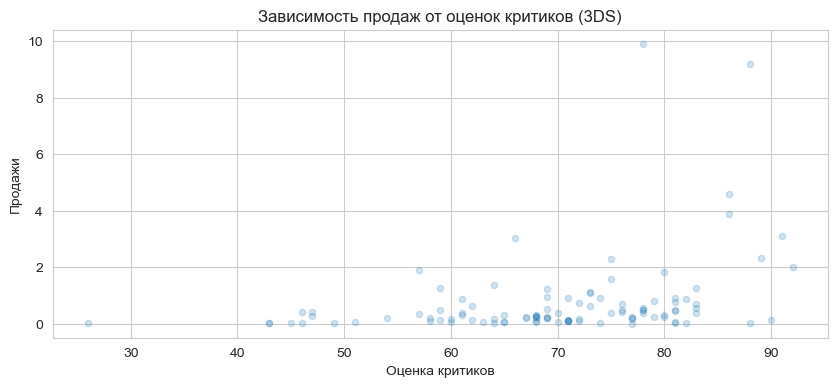

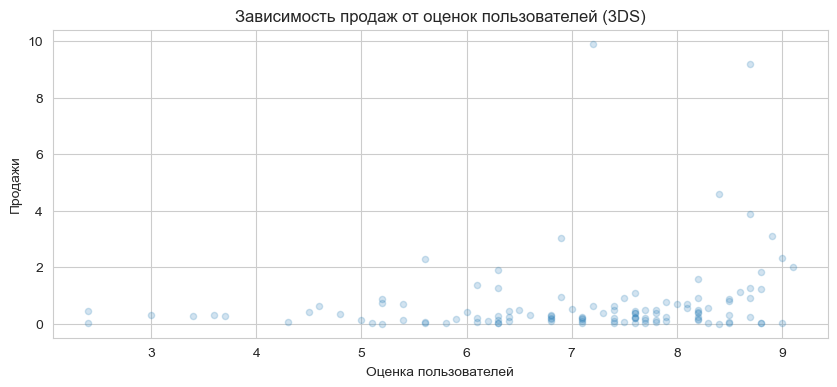

In [53]:
(data_new.query('critic_score >= 0 and platform == "3DS"')
 .sort_values('sales')
 .plot(x='critic_score', y='sales', kind='scatter', grid=True, figsize=(10, 4), alpha=0.2))
plt.title('Зависимость продаж от оценок критиков (3DS)', fontsize=12)
plt.xlabel('Оценка критиков', fontsize=10)
plt.ylabel('Продажи', fontsize=10)
plt.show()

(data_new.query('user_score >= 0 and platform == "3DS"')
 .sort_values('sales')
 .plot(x='user_score', y='sales', kind='scatter', grid=True, figsize=(10, 4), alpha=0.2))
plt.title('Зависимость продаж от оценок пользователей (3DS)', fontsize=12)
plt.xlabel('Оценка пользователей', fontsize=10)
plt.ylabel('Продажи', fontsize=10)
plt.show()

In [54]:
#выведем коэффициенты корреляции Пирсона
round((data_new
 .query('critic_score >= 0 and user_score >= 0 and platform == "3DS"')[['user_score', 'critic_score', 'sales']]
 .corr()), 2)

,user_score,critic_score,sales
user_score,1.00,0.72,0.20
critic_score,0.72,1.00,0.31
sales,0.20,0.31,1.00


Здесь видим еще более слабую связь, коэффициент корреляции суммы продаж и оценок критиков игр для PC равен 0.24, для портативной платформы 3DS 0.31, при этом для последней прослеживается очень слабая зависимость (0.2) от оценок пользователей. В любом случае, показатели корреляции между продажами и оценками для платформ PC и 3DS ничтожно малы и не являются исчерпывающими данными для доказательства зависимости.

##### 3.6 Посмотрим на общее распределение игр по жанрам

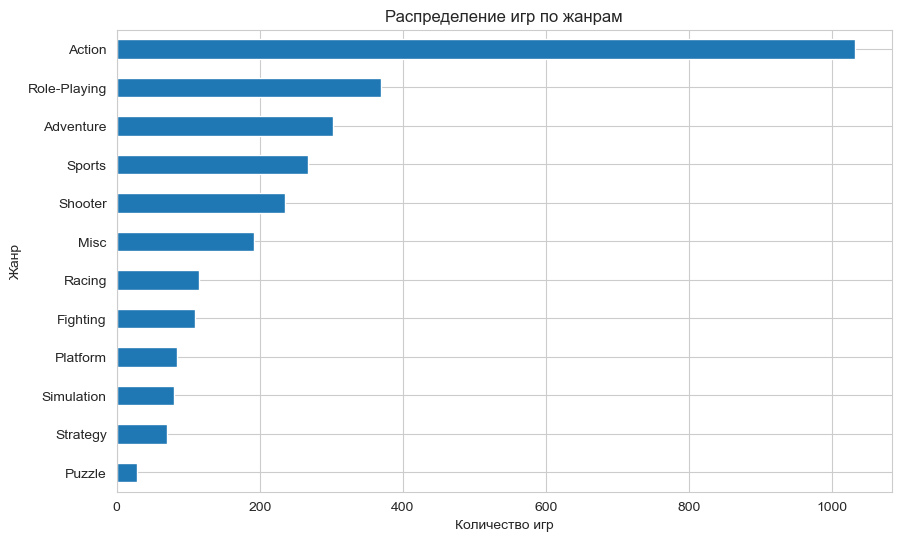

In [55]:
data_new['genre'].value_counts(ascending=True).plot(kind='barh', figsize=(10, 6), grid=True)
plt.title('Распределение игр по жанрам')
plt.xlabel('Количество игр')
plt.ylabel('Жанр')
plt.show()

In [56]:
data_new['genre'].value_counts()

genre
Action          1031
Role-Playing     370
Adventure        302
Sports           267
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: count, dtype: int64

По жанру Action в выборке представлено чуть более 1000 игр, что почти в 3 раза превышает следующий по численности жанр - Role-Playing. Также к популярным и прибыльным жанрам можно отнести жанры Adventure, Sports, Shooter, Misc, каждый из которых включает порядка 200-300 игр. Менее всего пользователи заинтересованы в Platform, Simulation, Strategy и Puzzle.

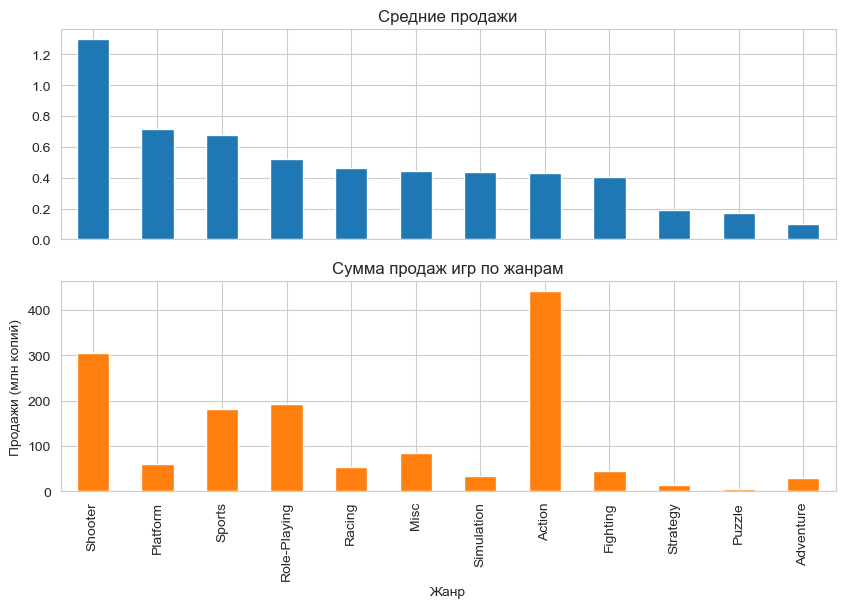

In [57]:
data_genres = (data_new.pivot_table(index='genre', values='sales', aggfunc=['mean', 'sum'])).sort_values(by=('mean', 'sales'), ascending=False)
data_genres.columns = ['Средние продажи', 'Сумма продаж']
data_genres.plot(kind='bar',  subplots=True, figsize=(10, 6), grid=True, legend=False)
plt.title('Сумма продаж игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи (млн копий)')
plt.show()

Самые высокие продажи за 2012-2016 гг у жанров Action - более 400 млн проданных копий, Shooter - 305 млн копий, Role-Playing 193 млн копий и Sports - 181 млн копий. Самые низкие продажи по жанрам Strategy (13 млн проданных копий)и Puzzle - менее 5 млн проданных копий за 5 лет. Среди жанров, которые могут стабильно приносить высокий доход, можно отметить Shooter со средними продажами около 130 тыс, в жанре Platform и Sports в среднем около 70 тыс. Наименее прибыльные жанры Adventure, Strategy и Puzzle, средние продажи по которым не превышают 30 тыс копий.	

In [58]:
data_genres.sort_values(by=('Сумма продаж'), ascending=False)

,Средние продажи,Сумма продаж
genre,,
Action,0.427856,441.12
Shooter,1.296723,304.73
Role-Playing,0.521081,192.80
Sports,0.678127,181.06
Misc,0.442917,85.04
Platform,0.717647,61.00
Racing,0.465217,53.50
Fighting,0.408165,44.49
Simulation,0.439000,35.12


##### Вывод:

Полагаясь на продажи игр для PlayStation и Nintendo DS (GBA), можно отметить, что характерный срок смены старых платформ новыми версиями 5-6 лет.

На протяжении рассматриваемого периода по сумме продаж всех регионов лидирует платформа PlayStation: с 2012 по 2014 гг продажи игр для PS3 примерно на 20% выше продаж его ближайшего конкурента X360, с появлением новых версий обоих платформ, продажи игр на них устремились вниз, а для набирающих популярность PS4 и XOne продажи первой на стали превышать продажи последней более, чем на 40%. Дополнительно среди лидеров можно отметить Nintendo со стабильно высоким уровнем продаж игр на 3DS (≈30-50 млн копий в год) и портативную платформу WiiU (≈20 млн копий в год). На PSV, конкурирующую с WiiU, также стабильно приходится около 10 млн проданных копий. В среднем 12 млн игр в год продается для PC.

Ориентируясь на растущие продажи в предыдущие годы явно выделили две потенциально прибыльные платформы: PS4 и XOne. Также можно предположить, что фанаты компьютерных игр могут обеспечить стабильную прибыль для PC.

Медианное значение продаж для PS3, PS4, Wii равно примерно 200 тыс проданных копий, для XOne, WiiU - примерно 250 тыс, для остальных платформ около 100-120 тыс. Рынок игр очень специфичный и некоторые игры имеют стабильно высокие продажи в течение нескольких лет. Скорее всего, выбросы, которые мы видим на диаграмме размаха, как раз демонстрируют продажи по самым популярным играм, соответственно, очистив данные от них, мы не будем видеть реальной картины рынка видеоигр.

На продажи игр умеренно влияют оценки критиков (платформам PS4 и XOne на графиках прослеживается прямая зависмость, коэффициенты корреляции равны 0.41).

К наиболее популярным жанрам можно отнести Action - более 1000 игр, Role-Playing -370, далее идут Adventure, Sports, Shooter, Misc, каждый из которых включает порядка 200-300 игр. Менее всего пользователи заинтересованы в Platform, Simulation, Strategy и Puzzle, количество игр по эти жанрам не превышает 100.

Самые высокие продажи за 2012-2016 гг у жанров Action - более 400 млн проданных копий, Shooter - 305 млн копий, Role-Playing 193 млн копий и Sports - 181 млн копий. Самые низкие продажи по жанрам Strategy (13 млн проданных копий)и Puzzle - менее 5 млн проданных копий за 5 лет. Среди жанров, которые могут стабильно приносить высокий доход, можно отметить Shooter со средними продажами около 130 тыс, в жанре Platform и Sports в среднем около 70 тыс. Наименее прибыльные жанры Adventure, Strategy и Puzzle, средние продажи по которым не превышают 30 тыс копий.

#### Шаг 4. Составим портрет пользователя каждого региона

##### 4.1 Определим самые популярные платформы (топ-5) для пользователя каждого региона (NA, EU, JP)

In [59]:
pl_na = (data_new
         .pivot_table(index='platform', values='na_sales', aggfunc='sum')
         .reset_index()
         .sort_values(by='na_sales', ascending=False))
pl_na['ratio'] = round((pl_na['na_sales']/pl_na['na_sales'].sum()*100), 0)

pl_na

,platform,na_sales,ratio
9,X360,140.05,24.0
4,PS4,108.74,18.0
3,PS3,103.38,17.0
10,XOne,93.12,16.0
0,3DS,55.31,9.0
8,WiiU,38.10,6.0
2,PC,19.12,3.0
7,Wii,17.45,3.0
6,PSV,10.98,2.0
1,DS,4.59,1.0


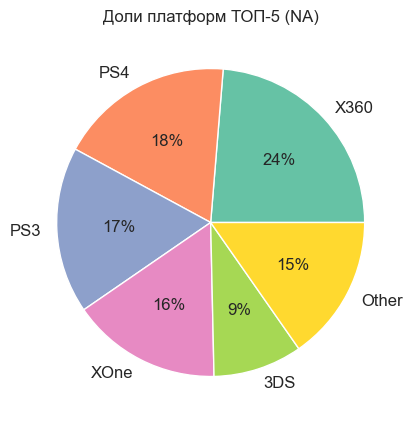

In [60]:
x_na = pl_na['na_sales'].head().tolist() + [pl_na['na_sales'].sum() - pl_na['na_sales'].head().sum()]
labels_na = pl_na['platform'].head().tolist() + ['Other']

plt.figure(figsize=(5,5))
plt.pie(x=x_na, labels=labels_na, 
        autopct='%1.0f%%', textprops={'fontsize':12}, colors=sns.color_palette('Set2'))
plt.title('Доли платформ ТОП-5 (NA)')
plt.show()

In [61]:
pl_eu = (data_new
         .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
         .reset_index()
         .sort_values(by='eu_sales', ascending=False))
pl_eu['ratio'] = round((pl_eu['eu_sales']/pl_eu['eu_sales'].sum()*100), 0)

pl_eu

,platform,eu_sales,ratio
4,PS4,141.09,28.0
3,PS3,106.85,21.0
9,X360,74.52,15.0
10,XOne,51.59,10.0
0,3DS,42.64,8.0
2,PC,37.76,7.0
8,WiiU,25.13,5.0
7,Wii,11.92,2.0
6,PSV,11.36,2.0
1,DS,3.53,1.0


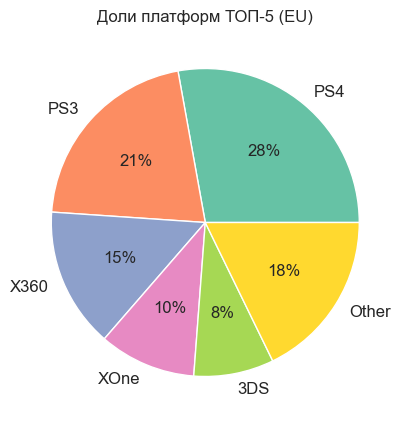

In [62]:
x_eu = pl_eu['eu_sales'].head().tolist() + [pl_eu['eu_sales'].sum() - pl_eu['eu_sales'].head().sum()]
labels_eu = pl_eu['platform'].head().tolist() + ['Other']

plt.figure(figsize=(5,5))
plt.pie(x=x_eu, labels=labels_eu, 
        autopct='%1.0f%%', textprops={'fontsize':12}, colors=sns.color_palette('Set2'))
plt.title('Доли платформ ТОП-5 (EU)')
plt.show()

In [63]:
pl_jp = (data_new
         .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
         .reset_index()
         .sort_values(by='jp_sales', ascending=False))
pl_jp['ratio'] = round((pl_jp['jp_sales']/pl_jp['jp_sales'].sum()*100), 0)

pl_jp

,platform,jp_sales,ratio
0,3DS,87.79,46.0
3,PS3,35.29,18.0
6,PSV,21.04,11.0
4,PS4,15.96,8.0
8,WiiU,13.01,7.0
5,PSP,10.47,5.0
1,DS,3.72,2.0
7,Wii,3.39,2.0
9,X360,1.57,1.0
10,XOne,0.34,0.0


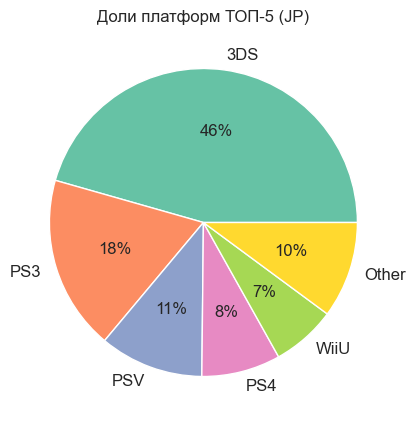

In [64]:
x_jp = pl_jp['jp_sales'].head().tolist() + [pl_jp['jp_sales'].sum() - pl_jp['jp_sales'].head().sum()]
labels_jp = pl_jp['platform'].head().tolist() + ['Other']

plt.figure(figsize=(5,5))
plt.pie(x=x_jp, labels=labels_jp, 
        autopct='%1.0f%%', textprops={'fontsize':12}, colors=sns.color_palette('Set2'))
plt.title('Доли платформ ТОП-5 (JP)')
plt.show()

За 2014-2016 гг среди пользователей Северной Америки наиболее популярной стала платформа X360, продажи игр для этой платформы составили 24% от всех продаж в регионе. Немного уступают по популярности игры для консолей PlayStation - продажи для PS4 составляют 18%, для PS3 - 17%. XOne (16%) набирает популярность и пока занимает 4-е место среди проданных игр, замыкает топ-5 3DS c 9% игр. На остальные платформы приходится всего 15% проданных игр в Северной Америке.

Пользователи из Европы за рассматриваемый период предпочитали PS4, продажи игр для нее составили 28%, на втором месте старая версия консоли PS3 с долей рынка 21%. С консолями XBox, наоборот, игры для старой версии X360 оказались более актуальными, их продажи составили 15% против 10% XOne. Игры на 3DS заняли 8% продаж и так же, как среди американских пользователей в Европе заняли 5-е место по популярности. 17% рынка заняли игры для других платформ.

По продажам игр в Японии абсолютно другая картина - 46% рынка занимают продажи игр на Nintendo 3DS, также в лидерах по продажам можно увидеть PSV с 11% от общих продаж. Если в Европе и Северной Америке наиболее популярны стационарные консоли, в Японии явно лидируют портативные. При этом в топ-5 также вошли PS3 (18%), PS4 (11%) и WiiU (7%). Всего 10% рынка делят между собой игры для других платформ.

##### 4.2 Определим самые популярные жанры (топ-5) для пользователя каждого региона (NA, EU, JP)

In [65]:
genre_na = (data_new
         .pivot_table(index='genre', values='na_sales', aggfunc='sum')
         .reset_index()
         .sort_values(by='na_sales', ascending=False))
genre_na['ratio'] = round((genre_na['na_sales']/genre_na['na_sales'].sum()*100), 0)

genre_na.head()

,genre,na_sales,ratio
0,Action,177.84,30.0
8,Shooter,144.77,24.0
10,Sports,81.53,14.0
7,Role-Playing,64.00,11.0
3,Misc,38.19,6.0


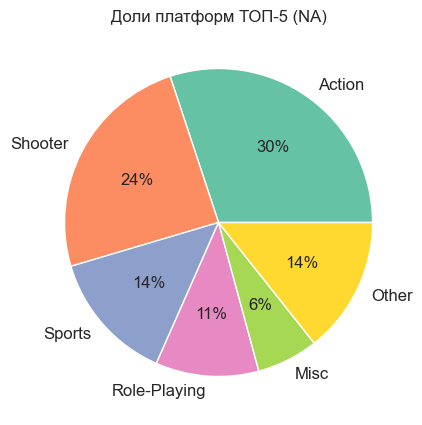

In [66]:
x_na_g = genre_na['na_sales'].head().tolist() + [genre_na['na_sales'].sum() - genre_na['na_sales'].head().sum()]
labels_na_g = genre_na['genre'].head().tolist() + ['Other']

plt.figure(figsize=(5,5))
plt.pie(x=x_na_g, labels=labels_na_g, 
        autopct='%1.0f%%', textprops={'fontsize':12}, colors=sns.color_palette('Set2'))
plt.title('Доли платформ ТОП-5 (NA)')
plt.show()

In [67]:
genre_eu = (data_new
         .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
         .reset_index()
         .sort_values(by='eu_sales', ascending=False))
genre_eu['ratio'] = round((genre_eu['eu_sales']/genre_eu['eu_sales'].sum()*100), 0)

genre_eu.head()

,genre,eu_sales,ratio
0,Action,159.34,31.0
8,Shooter,113.47,22.0
10,Sports,69.08,14.0
7,Role-Playing,48.53,10.0
6,Racing,27.29,5.0


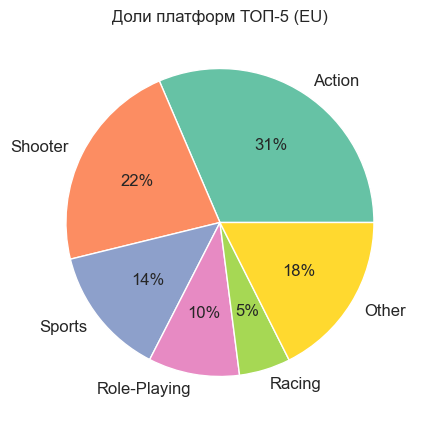

In [68]:
x_eu_g = genre_eu['eu_sales'].head().tolist() + [genre_eu['eu_sales'].sum() - genre_eu['eu_sales'].head().sum()]
labels_eu_g = genre_eu['genre'].head().tolist() + ['Other']

plt.figure(figsize=(5,5))
plt.pie(x=x_eu_g, labels=labels_eu_g, 
        autopct='%1.0f%%', textprops={'fontsize':12}, colors=sns.color_palette('Set2'))
plt.title('Доли платформ ТОП-5 (EU)')
plt.show()

In [69]:
genre_jp = (data_new
         .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
         .reset_index()
         .sort_values(by='jp_sales', ascending=False))
genre_jp['ratio'] = round((genre_jp['jp_sales']/genre_jp['jp_sales'].sum()*100), 0)

genre_jp.head()

,genre,jp_sales,ratio
7,Role-Playing,65.44,34.0
0,Action,52.80,27.0
3,Misc,12.86,7.0
9,Simulation,10.41,5.0
2,Fighting,9.44,5.0


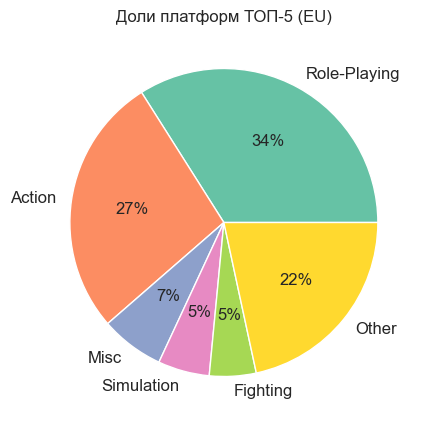

In [70]:
x_jp_g = genre_jp['jp_sales'].head().tolist() + [genre_jp['jp_sales'].sum() - genre_jp['jp_sales'].head().sum()]
labels_jp_g = genre_jp['genre'].head().tolist() + ['Other']

plt.figure(figsize=(5,5))
plt.pie(x=x_jp_g, labels=labels_jp_g, 
        autopct='%1.0f%%', textprops={'fontsize':12}, colors=sns.color_palette('Set2'))
plt.title('Доли платформ ТОП-5 (EU)')
plt.show()

ТОП-5 по жанрам игр среди пользователей из Европы и Северной Америки распределен практически одинаково, различие только в пятой строке рейтинга: первые предпочли Racing (5% продаж), вторые - Misc (6%). Среди пользователей из Японии самый популярный жанр - Role-Playing составил 34%. Второй по популярности Action - 27%, для пользователей из Европы и Северной Америки этот жанр на первом месте, составляет 31% и 30% рынка соответственно. Еще одно пересечение среди пользователей из Японии и Америки - игры в жанре Misc, которые в обоих регионах занимают небольшую долю рынка 6-7%.

##### 4.3 Определим, влияет ли рейтинг ESRB на продажи в отдельном регионе?

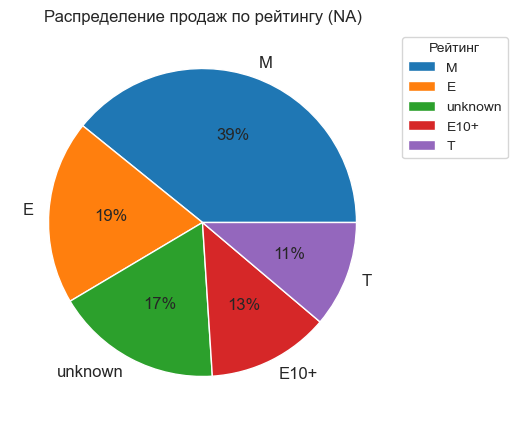

In [71]:
(data_new
 .pivot_table(index='rating', values='na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending=False)
 .plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize':12}, figsize=(5, 5), subplots=True, grid=True))
plt.title('Распределение продаж по рейтингу (NA)')
plt.ylabel('')
plt.legend(title='Рейтинг', bbox_to_anchor=(1, 1))
plt.show()

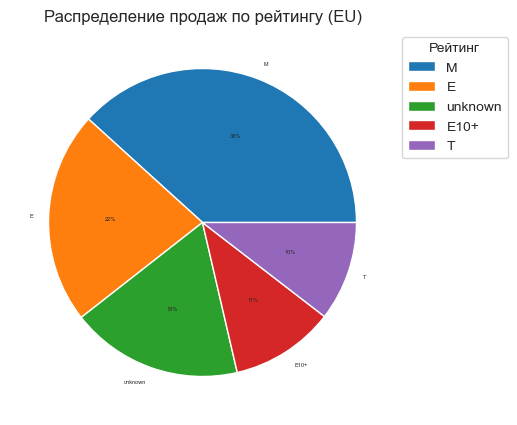

In [73]:
(data_new
 .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending=False)
 .plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize':4}, figsize=(5, 5), subplots=True, grid=True))
plt.title('Распределение продаж по рейтингу (EU)')
plt.ylabel('')
plt.legend(title='Рейтинг', bbox_to_anchor=(1, 1))
plt.show()

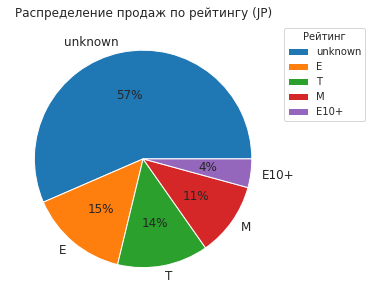

In [72]:
(data_new
 .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=False)
 .plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize':12}, figsize=(5, 5), subplots=True, grid=True))
plt.title('Распределение продаж по рейтингу (JP)')
plt.ylabel('')
plt.legend(title='Рейтинг', bbox_to_anchor=(1, 1))
plt.show()

Распределение продаж по рейтингу для Северной Америки (NA) и Европы (EU) практически одинаково —  больше всего (около 47% для каждого региона) продаются игры с маркировкой «Mature» — Для взрослых, около 20% продаж занимают игры с рейтингом «Everyone» — Для всех, по 13% и 11% соответсвенно приходится на игры «Everyone 10 and older» — Для всех от 10 лет и старше, 11% и 10% на игры для подростков. Игры с неопределенным рейтингом занимают 17% рынка в Северной Америке и 18% рынка в Европе.

В Японии (JP) совсем другие показатели продаж по рейтингам ESRB: больше половины проданных игр без указания рейтинга ESRB, на игры с маркировкой «Everyone» приходится 15% продаж, на втором месте игры для подростков (14%), 11% составляют игры для взрослых и всего 4% на игры из рейтинга «Everyone 10 and older».

Исходя из этого можно предположить, что рейтинг ESRB влияет на продажи в разных регионах, но нужно иметь в виду, что в Японии есть своя рейтинговая организация CERO, с чем, скорее всего, связана такая большая доля данных без рейтинга (57%) и, возможно оценивать продажи в этом регионе по рейтингу ESRB не совсем корректно.

##### Вывод:
За 2012-2016 гг среди пользователей Северной Америки лидирует платформа X360, продажи игр для этой платформы составили 24% от всех продаж в регионе. Немного уступают по популярности игры для консолей PlayStation - продажи для PS4 составляют 18%, для PS3 - 17%. XOne (16%) набирает популярность и пока занимает 4-е место среди проданных игр, замыкает топ-5 3DS c 9% игр. Пользователи из Европы за рассматриваемый период предпочитали PS4, продажи игр для нее составили 28%, на втором месте старая версия консоли PS3 с долей рынка 21%. С консолями XBox, наоборот, игры для старой версии X360 оказались более актуальными, их продажи составили 15% против 10% XOne. Игры на 3DS заняли 8% продаж и так же, как среди американских пользователей в Европе заняли 5-е место по популярности. В Японии 46% рынка занимают продажи игр на Nintendo 3DS, также в лидерах по продажам PSV с 11% от общих продаж. Если в Европе и Северной Америке наиболее популярны стационарные консоли, в Японии явно лидируют портативные. При этом в топ-5 также вошли PS3 (18%), PS4 (11%) и WiiU (7%). 

ТОП-5 по жанрам игр среди пользователей из Европы и Северной Америки распределен практически одинаково. Среди пользователей из Японии самый популярный жанр - Role-Playing составил 34%. Второй по популярности Action - 27%, для пользователей из Европы и Северной Америки этот жанр занимает первое место и составляет 31% и 30% рынка соответственно. Еще одно пересечение среди пользователей из Японии и Америки - игры в жанре Misc, которые в обоих регионах занимают небольшую долю рынка 6-7%.

Распределение продаж по рейтингу для Северной Америки (NA) и Европы (EU) практически одинаково — больше всего (около 40% для каждого региона) продаются игры для взрослых, около 20% продаж занимают игры для всех, по 13% и 11% соответсвенно приходится на игры от 10 лет и старше, 11% и 10% на игры для подростков. В Японии (JP) совсем другие показатели продаж по рейтингам ESRB: 57% проданных игр без указания рейтинга ESRB на игры с маркировкой «Everyone» приходится 15% продаж, на втором месте игры для подростков (14%), 11% составляют игры для взрослых и всего 14% игры из рейтинга «Everyone 10 and older». Но нужно иметь в виду, что в Японии есть своя рейтинговая организация CERO, и, возможно, оценивать продажи в этом регионе по рейтингу ESRB не совсем корректно.

#### Шаг 5. Проверим гипотезы

##### 5.1 Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативные гипотезы:

$H_{0}$: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

$H_{1}$: Средние пользовательские рейтинги платформы Xbox One и PC не равны

Ознакомимся с количеством наблюдений в выборках и их стандартными отклонениями.

In [73]:
data_new.query('user_score > 0 and platform == "XOne"')['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [74]:
data_new.query('user_score > 0 and platform == "PC"')['user_score'].describe()

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

Для проверки гипотезы используем двухвыборочный t-тест для независимых выборок (t-критерий Стьдента). Исходя из описания данных, будем считать, что дисперсии рассматриваемых выборок равны и не будем обозначать в t-тесте `equal_var`, поскольку по умолчанию он принимает значение `True`.

In [75]:
#выведем среднее значение для обеих выборок
print('Средние пользовательские рейтинги платформы Xbox One:', np.mean(data_new.query('user_score > 0 and platform == "XOne"')['user_score']))
print('Средние пользовательские рейтинги платформы PC:', np.mean(data_new.query('user_score > 0 and platform == "PC"')['user_score']))

alpha = 0.05

results = st.ttest_ind(
    data_new.query('user_score > 0 and platform == "XOne"')['user_score'],
    data_new.query('user_score > 0 and platform == "PC"')['user_score']
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу в пользу альтернативной')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средние пользовательские рейтинги платформы Xbox One: 6.521428571428572
Средние пользовательские рейтинги платформы PC: 6.4286407766990274
p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Вероятность случайно получить пользовательский рейтинг, близкий к 6.5 равна почти 55% и она больше уровня статистической значимости, поэтому по анализируемым данным нельзя с отвергнуть нулевую гипотезу. Поэтому можно полагать, что средние пользовательские рейтинги платформ Xbox One и PC равны

##### 5.2  Проверка гипотезы: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Сформулируем нулевую и альтернативные гипотезы:

$H_{0}$: Средние пользовательские рейтинги жанров Action и Sports равны

$H_{1}$: Средние пользовательские рейтинги жанров Action и Sports разные

Ознакомимся с количеством наблюдений в выборках и их распределением на графике

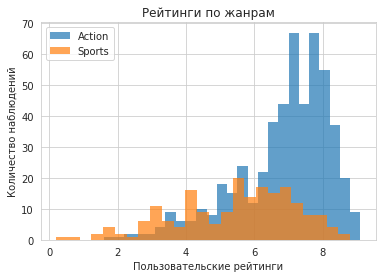

In [76]:
ax = data_new.query('user_score > 0 and genre == "Action"')['user_score'].plot(kind='hist', bins=25, linewidth=0, alpha=0.7, label='Action')
data_new.query('user_score > 0 and genre == "Sports"')['user_score'].plot(kind='hist', bins=25, linewidth=0, alpha=0.7, label='Sports', ax=ax, grid=True)
plt.title('Рейтинги по жанрам')
plt.xlabel('Пользовательские рейтинги')
plt.ylabel('Количество наблюдений')
plt.legend()

Для проверки гипотезы используем двухвыборочный t-тест для независимых выборок (t-критерий Стьдента). По графику распределения рейтингов по жанрам, видим, что данных по оценкам жанра Action гораздо больше, чем по Sports, а также центры выборок смещены вправо, но не совпадают. Есть высокая вероятность, что дисперсии рассматриваемых выборок различны, поэтому в t-тесте параметру `equal_var` передадим значение `False`.

In [77]:
#выведем среднее значение для обеих выборок
print('Средние пользовательские рейтинги жанра Action:', np.mean(data_new.query('user_score > 0 and genre == "Action"')['user_score']))
print('Средние пользовательские рейтинги жанра Sports:', np.mean(data_new.query('user_score > 0 and genre == "Sports"')['user_score']))

#зададим уровень статистической значимости
alpha = 0.05

#проверим нулевую гипотезу
results = st.ttest_ind(
    data_new.query('user_score > 0 and genre == "Action"')['user_score'],
    data_new.query('user_score > 0 and genre == "Sports"')['user_score'],
    equal_var=False,
)

#выведем вероятность при верной нулевой гипотезе получить наблюдаемое значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу в пользу альтернативной')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средние пользовательские рейтинги жанра Action: 6.825047801147227
Средние пользовательские рейтинги жанра Sports: 5.455670103092784
p-значение: 5.989458066467418e-20
Отвергаем нулевую гипотезу в пользу альтернативной


Значение p-value меньше выбранного уровня значимости, соответственно, равенство cредних пользовательских рейтингов жанров Action и Sports  маловероятно и нулевая гипотеза отвергается в пользу альтернативной, утверждающей, что средние пользовательские рейтинги указанных жанров разные

##### Вывод:
Можно полагать, что средние пользовательские рейтинги платформ Xbox One и PC равны, т.к. в ходе двухвыборочного тестирования по t-критерию Стьюдента эта гипотеза не была опровергнута. В ходе аналогичной проверки гипотезы о равенстве cредних пользовательских рейтингов жанров Action и Sports отвергаем нулевую гипотезу отвергается в пользу альтернативной, утверждающей, что средние пользовательские рейтинги указанных жанров разные.

#### Общий вывод

В ходе предобработки данных привели к нижнему регистру названия столбцов, исключили их из датафрейма строки с пропусками с пропусками в столбцах `name`, `genre`, `year_of_release`, поскольку их доля составляет менее 2% данных и всего 1% от общей суммы продаж всех регионов. Строки с неопределенными на текущий момент оценками пользователей (tbd), заменили их на значения na, затем заполнили пропуски в `critic_score` и `user_score` номинальным значением -1, а пропуски в столбце `rating` - значением unknown. Также в ходе предобработки изменили типы данных для колонок `year_of_release`, `critic_score`, `user_score`, удалили неявные дубликаты и убедились в отсутствии явных.

Исследовательский анализ данных показал, что:
- характерный срок смены старых платформ новыми версиями около 10 лет.

- на протяжении рассматриваемого периода по сумме продаж всех регионов лидирует платформа PlayStation: с 2012 по 2014 гг продажи игр для PS3 примерно на 20% выше продаж его ближайшего конкурента X360.

- две потенциально прибыльные платформы: PS4 и XOne. Также можно предположить, что фанаты компьютерных игр могут обеспечить стабильную прибыль для PC.

- на продажи игр умеренно влияют оценки критиков (платформам PS4 и XOne на графиках прослеживается прямая зависмость, коэффициенты корреляции равны 0.41).

- среди жанров, которые могут стабильно приносить высокий доход, можно отметить Shooter со средними продажами около 130 тыс, в жанре Platform и Sports в среднем около 70 тыс. Наименее прибыльные жанры Adventure, Strategy и Puzzle, средние продажи по которым не превышают 30 тыс копий.

За 2012-2016 гг среди пользователей Северной Америки лидирует платформа X360, продажи игр для этой платформы составили 24% от всех продаж в регионе. Немного уступают по популярности игры для консолей PlayStation - продажи для PS4 составляют 18%, для PS3 - 17%. XOne (16%) набирает популярность и пока занимает 4-е место среди проданных игр, замыкает топ-5 3DS c 9% игр. Среди пользователей из Европы 28% игр покупалось для PS4, на втором месте старая версия консоли PS3 с долей рынка 21%. С консолями XBox, наоборот, игры для старой версии X360 оказались более актуальными, их продажи составили 15% против 10% XOne. Игры на 3DS заняли 8% продаж и заняли 5-е место по популярности. В Японии 46% рынка занимают продажи игр на Nintendo 3DS, также в лидерах по продажам PSV с 11% от общих продаж. Если в Европе и Северной Америке наиболее популярны стационарные консоли, в Японии явно лидируют портативные. При этом в топ-5 также вошли PS3 (18%), PS4 (11%) и WiiU (7%).

Среди пользователей из Японии самый популярный жанр - Role-Playing составил 34%. Второй по популярности Action - 27%, для пользователей из Европы и Северной Америки этот жанр занимает первое место и составляет 31% и 30% рынка соответственно. Еще одно пересечение среди пользователей из Японии и Америки - игры в жанре Misc, которые в обоих регионах занимают небольшую долю рынка 6-7%.

Распределение продаж по рейтингу для Северной Америки (NA) и Европы (EU) практически одинаково — больше всего (около 40% для каждого региона) продаются игры для взрослых, около 20% продаж занимают игры для всех, по 13% и 11% соответсвенно приходится на игры от 10 лет и старше, 11% и 10% на игры для подростков. В Японии (JP) совсем другие показатели продаж по рейтингам ESRB: 57% проданных игр без указания рейтинга, на игры с маркировкой «Everyone» приходится 15% продаж, на втором месте игры для подростков (14%), 11% составляют игры для взрослых и всего 14% игры из рейтинга «Everyone 10 and older».

В ходе проверки гипотез выявили, что:
- нельзя опровергнуть равенство средних пользовательских рейтингов платформ Xbox One и PC;
- средние пользовательские рейтинги жанров Action и Sports различны.

**Рекомендации:**

Причиной пропусков в столбце `rating` может являться регион продажи игры, т.к. у многих стран есть свои возрастные рейтинги и не все применяют систему оценки ESRB, которая изначально ориентирована на США, Канаду и Мексику. Для анализируемых данных в зависмости от региона могут быть более предпочтительны PEGI — европейская рейтинговая система компьютерных и видеоигр или CERO — японская рейтинговая организация. Поскольку в Японии продано 57% игр продано без указания рейтинга, возможно, оценивать продажи в этом регионе по рейтингу ESRB не совсем корректно.